<a href="https://colab.research.google.com/github/Marcotmr/Sustainability-Report-Score/blob/main/Indicator_12_6_1_ML_NLP_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#connect to drive
from google.colab import drive

In [3]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
path_reports = "/content/drive/MyDrive/sustainability"

In [5]:
!pip install pikepdf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 66.2 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


In [6]:
!pip install PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.4 MB/s eta 0:00:00


In [7]:
!pip install pdfplumber

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.6/143.6 kB 12.4 MB/s eta 0:00:00


In [8]:
#import libraries
import os
import pikepdf
import pandas as pd
import re
from PyPDF2 import PdfFileReader
from pikepdf import Pdf
import pdfplumber

In [9]:
#define keywords and weights
keywords_weights = {
    "governance": {
        "chief": 6.25,
        "contact": 0.32894737,
        "officer": 6.25,
        "quality": 0.32894737,
        "manager": 0.32894737,
        "account": 0.32894737,
        "administrator": 0.32894737,
        "investment": 0.32894737,
        "legal": 0.32894737,
        "information": 0.32894737,
        "headquarters": 0.32894737,
        "resources": 0.32894737,
        "point": 0.32894737,
        "leader": 0.32894737,
        "marketing": 0.32894737,
        "technology": 0.32894737,
        "risk": 0.32894737,
        "executive": 0.32894737,
        "compliance": 0.32894737,
        "audit": 0.32894737,
        "business": 6.25,
        "communications": 0.32894737

    },
      "Social": {
          "diversity": 5,
          "inclusion": 5,
          "equality": 5,
          "culture": 0.5,
          "empathy": 0.5,
          "responsibility": 0.5,
          "ally": 0.5,
          "humanity": 0.5,
          "community": 5,
          "people": 0.5,
          "partnership": 0.5,
          "peace": 0.5,
          "commitments": 0.5,
          "volunteer": 0.5
      },
      "Financial": {
          "profit": 6.25,
          "revenue": 6.25,
          "equity": 6.25,
          "loans": 0.390625,
          "investment": 0.390625,
          "ROI": 0.390625,
          "funds": 0.390625,
          "return": 0.390625,
          "insurance": 0.390625,
          "stock": 0.390625,
          "shares": 0.390625,
          "buy": 0.390625,
          "sell": 0.390625,
          "purchase": 0.390625,
          "budget": 0.390625,
          "treasury": 0.390625,
          "tax": 0.390625,
          "credit": 0.390625,
          "interest": 0.390625
      },
      "Climate": {
          "emissions": 4.16666667,
          "sustainability": 4.16666667,
          "pollution": 4.16666667,
          "organic": 0.52083333,
          "recycle": 4.16666667,
          "energy": 0.52083333,
          "waste": 0.52083333,
          "resources": 0.52083333,
          "impact": 4.16666667,
          "gas": 0.52083333,
          "eco": 0.52083333,
          "reduce": 0.52083333,
          "planet": 0.52083333,
      }
}

In [10]:
results_df = pd.DataFrame(columns=["Company", "Governance", "Financial", "Social", "Climate", "Score"])

In [15]:
#this code will parse the reports from pdf to html, and will iterate through each report looking for the keywords. if a keyword is found the weight of the keyword will be added to each column and finally added to the final score
for filename in os.listdir(path_reports):
  if filename.endswith(".pdf"):
    match = re.search(r"(.*?)\s*report\.pdf", filename, re.IGNORECASE)
    if match:
      company_name = match.group(1)
      governance_score = 0
      social_score = 0
      financial_score = 0
      climate_score = 0
      with pdfplumber.open(os.path.join(path_reports, filename)) as pdf:
        for page in pdf.pages:
          text = page.extract_text().strip()
          for section, keywords in keywords_weights.items():
            section_score = 0
            for keyword, weight in keywords.items():
              if re.search(r"\b{}\b".format(keyword), text, re.IGNORECASE):
                section_score += weight
            if section == "governance":
              governance_score = section_score
            elif section == "Social":
              social_score = section_score
            elif section == "Financial":
              financial_score = section_score
            elif section == "Climate":
              climate_score = section_score  
      Score = governance_score + social_score + financial_score + climate_score
      results_df = results_df.append({
          "Company": company_name,
          "Governance": governance_score,
          "Social": social_score,
          "Financial": financial_score,
          "Climate": climate_score,
          "Score": Score
      }, ignore_index=True)

<ipython-input-15-515c9724daa6>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-15-515c9724daa6>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-15-515c9724daa6>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-15-515c9724daa6>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
<ipython-input-15-515c9724daa6>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = 

In [16]:
print(results_df)

                Company Governance Financial Social   Climate     Score
0              ABN amro          0         0      0         0         0
1              agrofair          0         0      0  4.166667  4.166667
2         ASR Nederland          0         0      0         0         0
3            Burg Group   0.657895         0    0.5  5.208333  6.366228
4                CTOUCH          0         0      0  4.166667  4.166667
..                  ...        ...       ...    ...       ...       ...
653            OMV 2021   1.315789  0.390625      0    4.6875  6.393914
654      Bilfinger 2019          0         0      0         0         0
655         Henkel 2022   1.315789  1.171875      0    4.6875  7.175164
656     schaeffler 2021          0         0      0         0         0
657  Red Electrica 2015          0         0      0         0         0

[658 rows x 6 columns]


In [17]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [18]:
print(results_df)

                                            Company Governance  Financial  \
0                                          ABN amro          0          0   
1                                          agrofair          0          0   
2                                     ASR Nederland          0          0   
3                                        Burg Group   0.657895          0   
4                                            CTOUCH          0          0   
5                                          dataflex          0          0   
6                                          DS Smith          0          0   
7                                            essity   0.986842          0   
8                                 Friesland Campina          0          0   
9                                          fujifilm   0.328947          0   
10                                         Heineken          0          0   
11                                              KPN          0          0   

In [19]:
#sort by descending
results_df.sort_values(by=['Score'],inplace=False,ascending=False)

,Company,Governance,Financial,Social,Climate,Score
47,alexander forbes,15.460526,8.203125,10.5,8.854167,43.017818
201,taisei group,21.381579,9.375,0.5,10.9375,42.194079
20,Volksbank,7.236842,12.890625,10,8.333333,38.4608
108,harmony,20.723684,1.5625,5,9.375,36.661184
352,PPL Corporation 2022,6.907895,13.671875,0.5,14.0625,35.14227
163,pan african,20.065789,8.59375,5,0.520833,34.180373
317,ABB 2017,7.236842,0,16.5,9.895833,33.632675
13,P&G,0.657895,0,21.0,8.333333,29.991228
126,kubota,7.894737,8.203125,5,8.854167,29.952029
46,ajinomoto,8.552632,14.453125,0.5,5.729167,29.234923


In [58]:
#create a new dataset where reports with score of 0 will be dropped
real_df = results_df[results_df['Score'] != 0]

In [21]:
print(real_df)

                                            Company Governance  Financial  \
1                                          agrofair          0          0   
3                                        Burg Group   0.657895          0   
4                                            CTOUCH          0          0   
6                                          DS Smith          0          0   
7                                            essity   0.986842          0   
9                                          fujifilm   0.328947          0   
13                                              P&G   0.657895          0   
17                              van lanschot kempen   0.328947          0   
20                                        Volksbank   7.236842  12.890625   
23                            minerals technologies   0.657895   0.390625   
28                                        accenture          0   0.390625   
30                                              ayo   0.328947          0   

In [22]:
#sort descending
real_df.sort_values(by=['Score'],inplace=False,ascending=False)

,Company,Governance,Financial,Social,Climate,Score
47,alexander forbes,15.460526,8.203125,10.5,8.854167,43.017818
201,taisei group,21.381579,9.375,0.5,10.9375,42.194079
20,Volksbank,7.236842,12.890625,10,8.333333,38.4608
108,harmony,20.723684,1.5625,5,9.375,36.661184
352,PPL Corporation 2022,6.907895,13.671875,0.5,14.0625,35.14227
163,pan african,20.065789,8.59375,5,0.520833,34.180373
317,ABB 2017,7.236842,0,16.5,9.895833,33.632675
13,P&G,0.657895,0,21.0,8.333333,29.991228
126,kubota,7.894737,8.203125,5,8.854167,29.952029
46,ajinomoto,8.552632,14.453125,0.5,5.729167,29.234923


In [23]:
real_df.describe()

,Company,Governance,Financial,Social,Climate,Score
count,312,312.000000,312.0,312.0,312.000000,312.000000
unique,312,21.000000,18.0,16.0,18.000000,131.000000
top,agrofair,0.328947,0.0,0.0,4.166667,4.166667
freq,1,90.000000,252.0,193.0,113.000000,53.000000


In [24]:
real_df.dtypes

Company       object
Governance    object
Financial     object
Social        object
Climate       object
Score         object
dtype: object

In [25]:
#change data types from object to integers
real_df['Governance'] = real_df['Governance'].astype('int64')
real_df['Financial'] = real_df['Financial'].astype('int64')
real_df['Social'] = real_df['Social'].astype('int64')
real_df['Climate'] = real_df['Climate'].astype('int64')
real_df['Score'] = real_df['Score'].astype('int64')

<ipython-input-25-945796a0b08a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['Governance'] = real_df['Governance'].astype('int64')
<ipython-input-25-945796a0b08a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['Financial'] = real_df['Financial'].astype('int64')
<ipython-input-25-945796a0b08a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [26]:
real_df.dtypes

Company       object
Governance     int64
Financial      int64
Social         int64
Climate        int64
Score          int64
dtype: object

In [27]:
real_df.describe()

,Governance,Financial,Social,Climate,Score
count,312.000000,312.000000,312.000000,312.000000,312.000000
mean,1.839744,0.570513,1.048077,2.955128,6.798077
std,3.556610,2.282640,2.982413,3.107595,7.959762
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,4.000000,4.000000
75%,1.000000,0.000000,0.000000,4.000000,9.000000
max,21.000000,16.000000,21.000000,18.000000,43.000000


In [11]:
import seaborn as sns

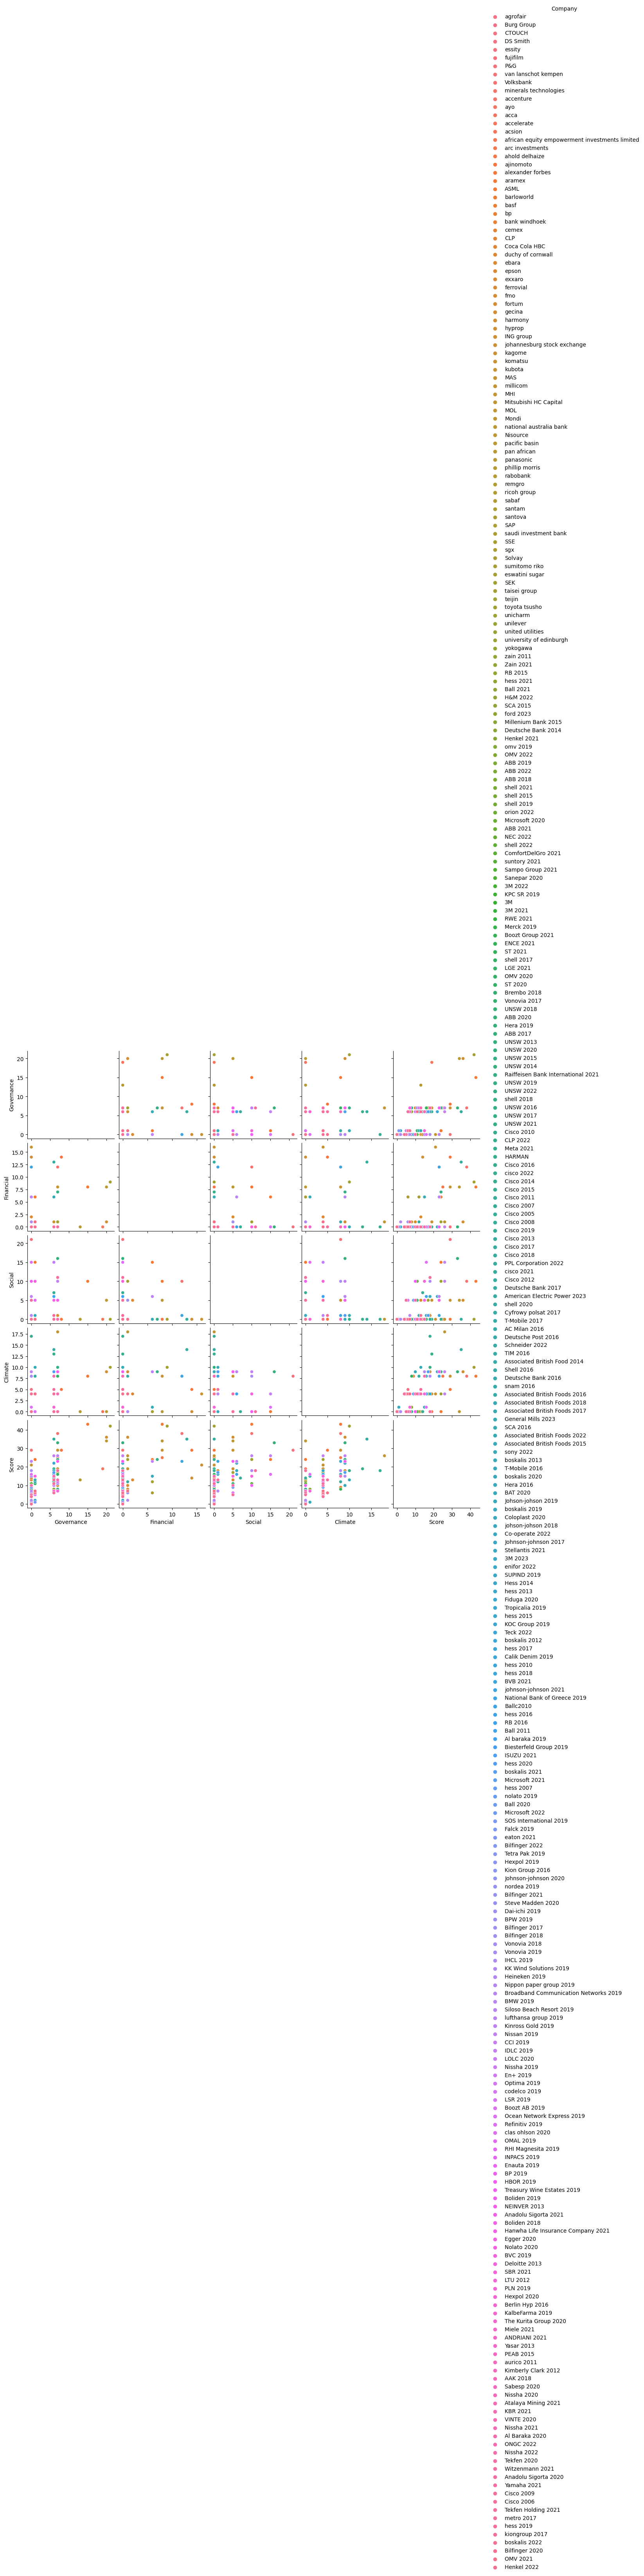

In [28]:
#correlation graph of all the companies
sns.pairplot(data=real_df, hue='Company')

<ipython-input-29-c6b6f7801b2c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = real_df.corr(method='pearson')


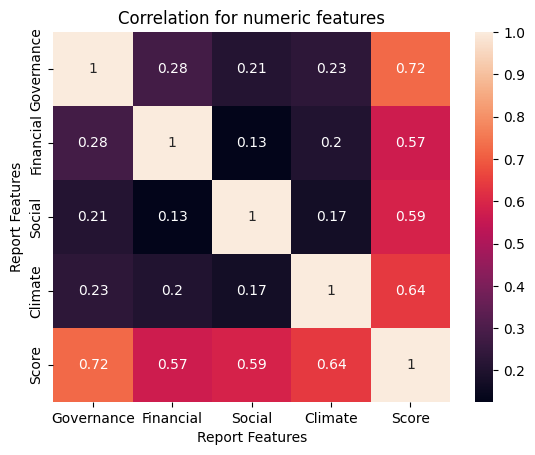

In [29]:
#correlation matrix to visualize
correlation_matrix = real_df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation for numeric features')
plt.xlabel('Report Features')
plt.ylabel('Report Features')

plt.show()

In [30]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [31]:
from matplotlib.pyplot import figure
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

<Axes: xlabel='Score', ylabel='Governance'>

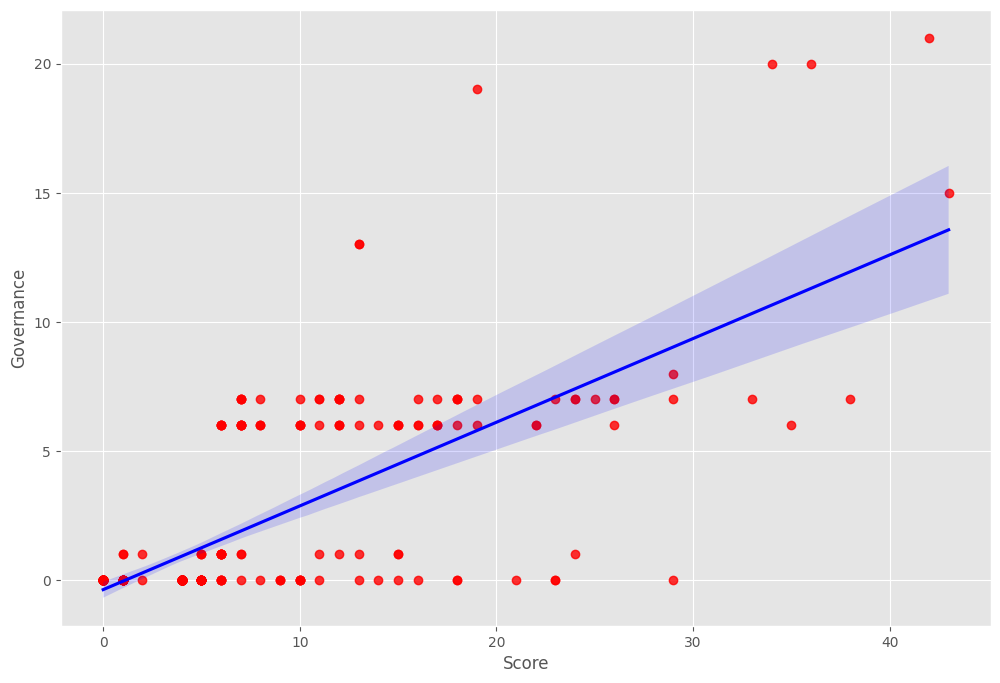

In [32]:
#correlation governance vs score
sns.regplot(x='Score',y='Governance',data=real_df, scatter_kws={"color":"red"},line_kws={"color":"blue"})

<Axes: xlabel='Score', ylabel='Climate'>

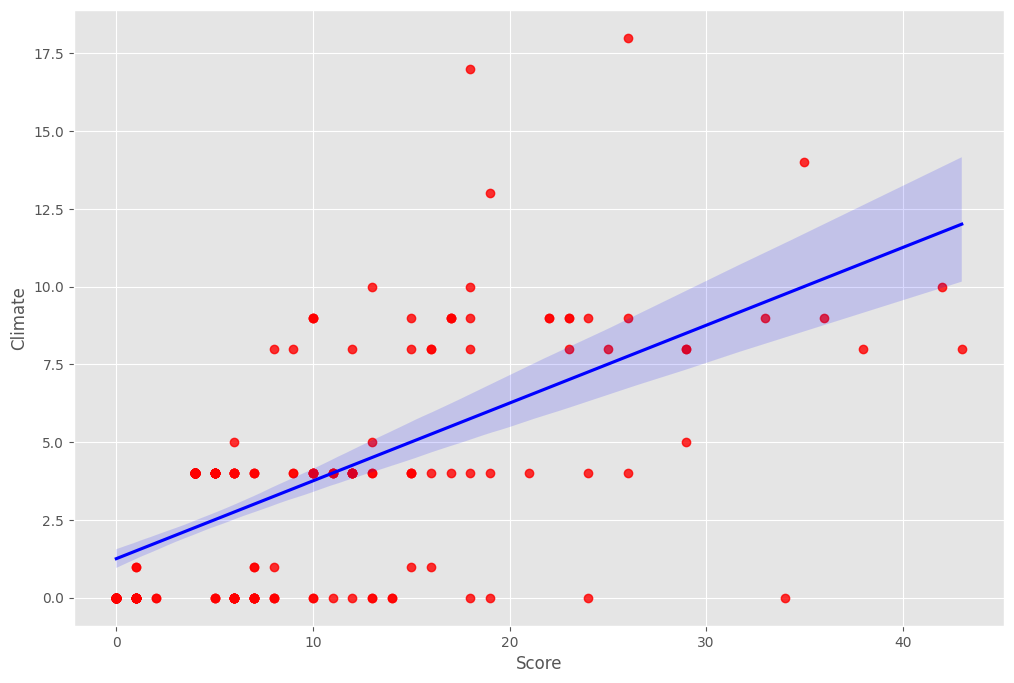

In [33]:
#correlation climate vs score
sns.regplot(x='Score',y='Climate',data=real_df, scatter_kws={"color":"red"},line_kws={"color":"blue"})

<Axes: xlabel='Score', ylabel='Social'>

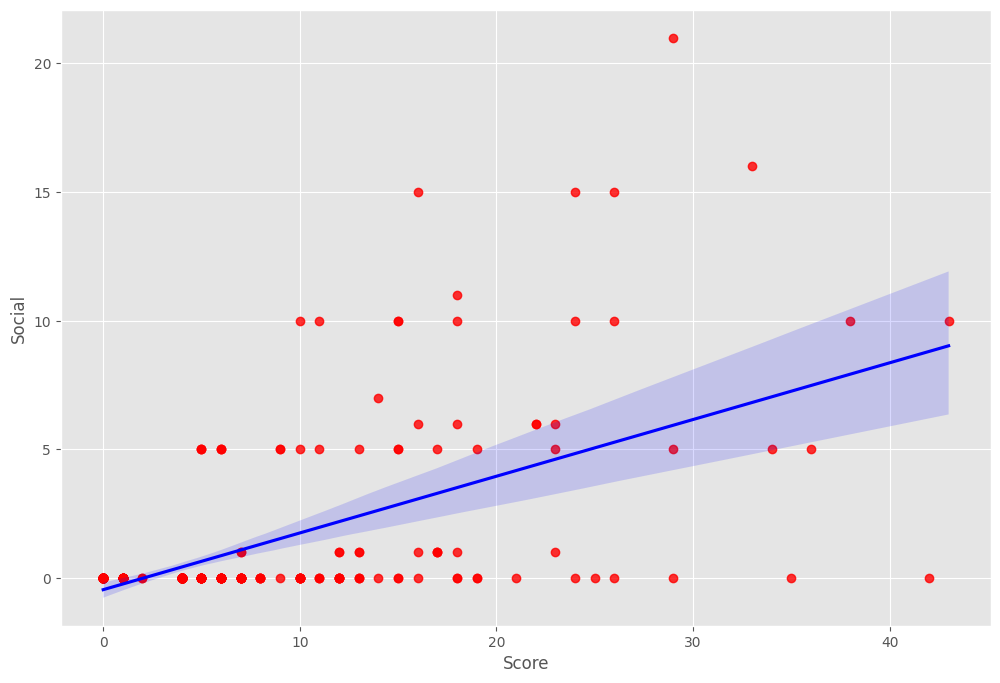

In [34]:
#correlation social vs score
sns.regplot(x='Score',y='Social',data=real_df, scatter_kws={"color":"red"},line_kws={"color":"blue"})

<Axes: xlabel='Score', ylabel='Financial'>

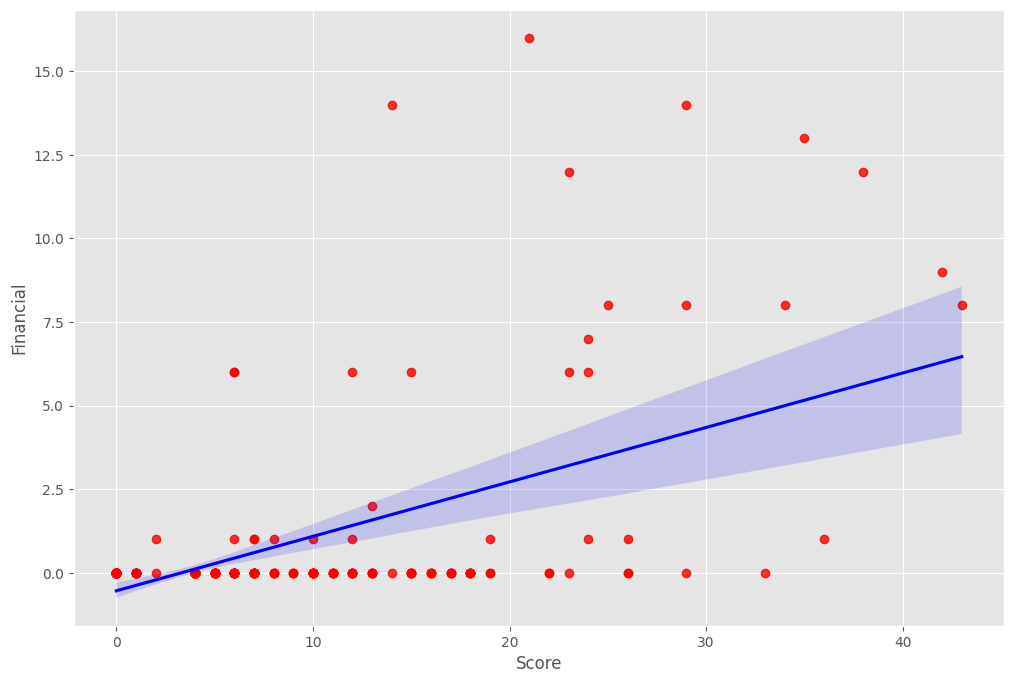

In [35]:
#correlation financial vs score
sns.regplot(x='Score',y='Financial',data=real_df, scatter_kws={"color":"red"},line_kws={"color":"blue"})

(array([179.,  53.,  26.,  22.,  10.,   9.,   6.,   2.,   3.,   2.]),
 array([ 0. ,  4.3,  8.6, 12.9, 17.2, 21.5, 25.8, 30.1, 34.4, 38.7, 43. ]),
 <BarContainer object of 10 artists>)

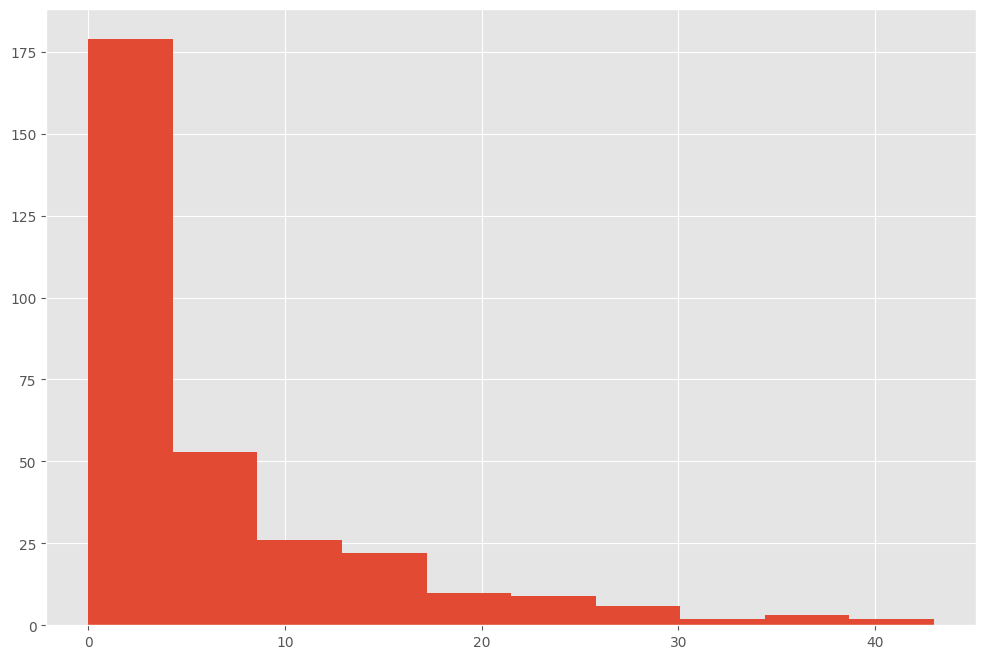

In [36]:
plt.hist(real_df['Score'])

In [13]:
import matplotlib.pyplot as plt

In [60]:
real_df['Year'] = real_df['Company'].str.extract('_(2\d+)$').fillna('2023')

<ipython-input-60-63c9bfe88253>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['Year'] = real_df['Company'].str.extract('_(2\d+)$').fillna('2023')


In [38]:
print(real_df)

                                            Company  Governance  Financial  \
1                                          agrofair           0          0   
3                                        Burg Group           0          0   
4                                            CTOUCH           0          0   
6                                          DS Smith           0          0   
7                                            essity           0          0   
9                                          fujifilm           0          0   
13                                              P&G           0          0   
17                              van lanschot kempen           0          0   
20                                        Volksbank           7         12   
23                            minerals technologies           0          0   
28                                        accenture           0          0   
30                                              ayo           0 

In [61]:
real_df = real_df.drop(columns=['Year'])

In [40]:
print(real_df)

                                            Company  Governance  Financial  \
1                                          agrofair           0          0   
3                                        Burg Group           0          0   
4                                            CTOUCH           0          0   
6                                          DS Smith           0          0   
7                                            essity           0          0   
9                                          fujifilm           0          0   
13                                              P&G           0          0   
17                              van lanschot kempen           0          0   
20                                        Volksbank           7         12   
23                            minerals technologies           0          0   
28                                        accenture           0          0   
30                                              ayo           0 

In [62]:
real_df['Company'] = real_df['Company'].astype('str')

In [63]:
#adding year column to table
real_df['Year'] = real_df['Company'].str.extract('(20\d+)$').fillna('2023')

In [51]:
print(real_df)

                                            Company  Governance  Financial  \
1                                          agrofair           0          0   
3                                        Burg Group           0          0   
4                                            CTOUCH           0          0   
6                                          DS Smith           0          0   
7                                            essity           0          0   
9                                          fujifilm           0          0   
13                                              P&G           0          0   
17                              van lanschot kempen           0          0   
20                                        Volksbank           7         12   
23                            minerals technologies           0          0   
28                                        accenture           0          0   
30                                              ayo           0 

In [64]:
real_df.sort_values(by=['Year'],inplace=False,ascending=False)

,Company,Governance,Financial,Social,Climate,Score,Year
1,agrofair,0,0,0,4.166667,4.166667,2023
164,panasonic,6.578947,0,0,4.166667,10.745614,2023
180,SAP,0.328947,0,0,0,0.328947,2023
179,santova,0.328947,0,0,0,0.328947,2023
178,santam,0.328947,0,0,0,0.328947,2023
177,sabaf,0,0,0,4.166667,4.166667,2023
175,ricoh group,13.815789,0,0,0,13.815789,2023
172,remgro,7.236842,0.390625,0,0,7.627467,2023
169,rabobank,7.565789,0,0.5,4.166667,12.232456,2023
165,phillip morris,0.328947,0,0,0,0.328947,2023


In [65]:
real_df.groupby('Year')['Score'].mean()

Year
2005     0.828947
2006     6.907895
2007     9.287281
2008     6.486842
2009    18.627467
2010     5.749635
2011     7.318120
2012     2.415570
2013     6.439419
2014     7.175658
2015     5.460313
2016     3.514066
2017     7.389254
2018     7.733507
2019     6.652767
2020     6.196840
2021     6.846133
2022     6.620435
2023     9.358239
Name: Score, dtype: float64

In [71]:
real_df.groupby('Year').count()

,Company,Governance,Financial,Social,Climate,Score
Year,,,,,,
2005,1,1,1,1,1,1
2006,1,1,1,1,1,1
2007,2,2,2,2,2,2
2008,1,1,1,1,1,1
2009,1,1,1,1,1,1
2010,3,3,3,3,3,3
2011,4,4,4,4,4,4
2012,4,4,4,4,4,4
2013,7,7,7,7,7,7


<Axes: xlabel='Year'>

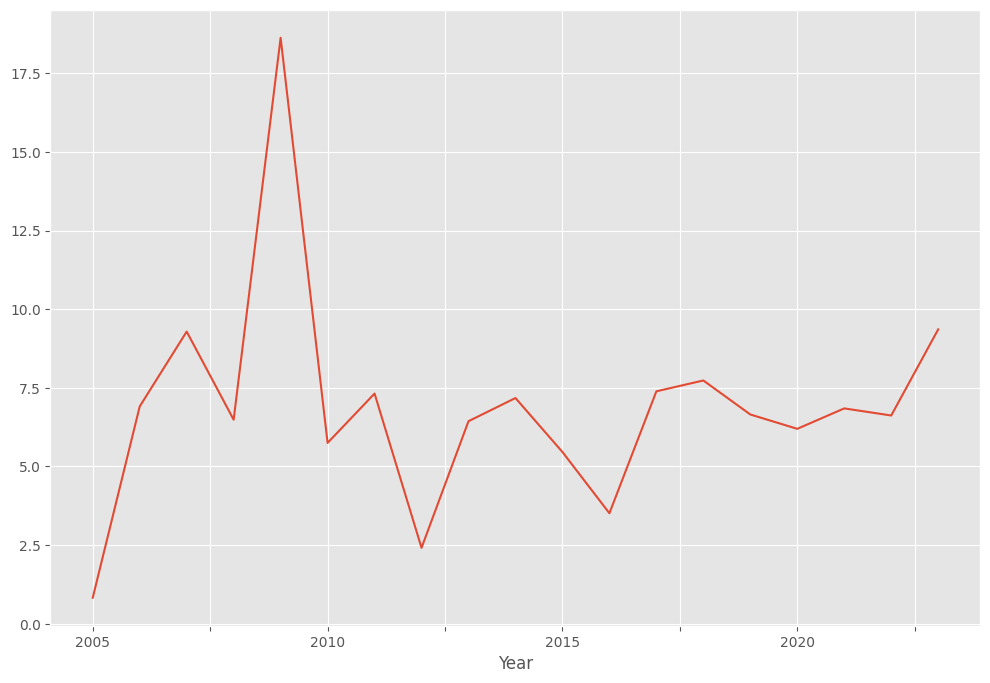

In [81]:
#plotting average score per year
real_df.groupby('Year')['Score'].mean().plot()

<ipython-input-82-267d54fc4a42>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  real_df.groupby('Year').mean().plot()


<Axes: xlabel='Year'>

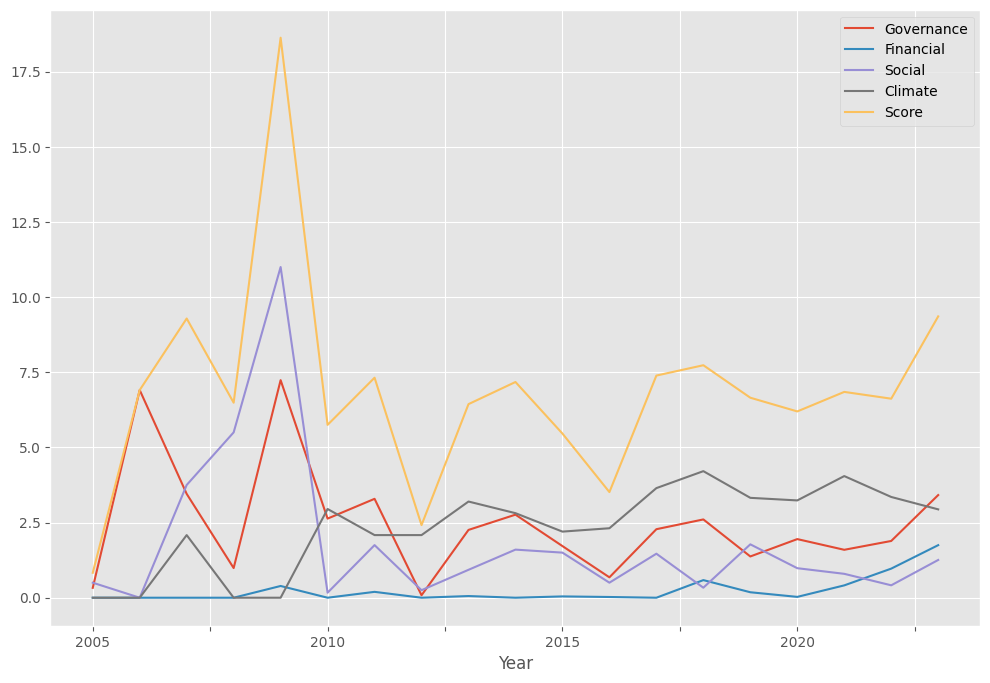

In [82]:
#plotting score from each column (gov, financial, social, climate, score) per year
real_df.groupby('Year').mean().plot()

<Axes: xlabel='Year'>

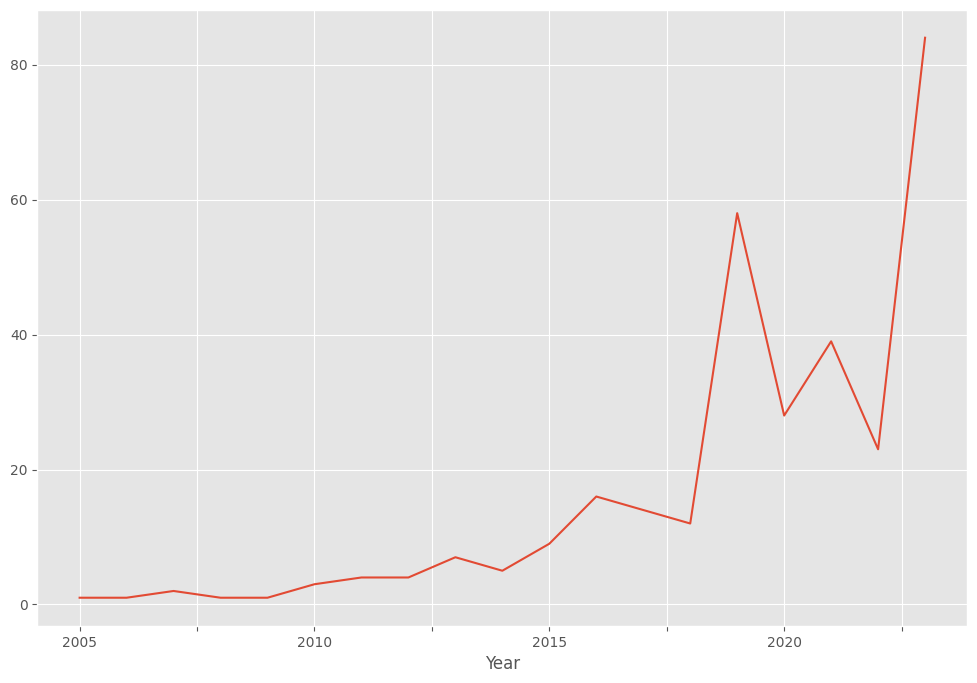

In [83]:
#plotting number of reports per year
real_df.groupby('Year')['Company'].count().plot()

In [85]:
top_ten = real_df.sort_values(by=['Score'],inplace=False,ascending=False).head(10)

In [86]:
print(top_ten)

                  Company Governance  Financial Social   Climate      Score  \
47       alexander forbes  15.460526   8.203125   10.5  8.854167  43.017818   
201          taisei group  21.381579      9.375    0.5   10.9375  42.194079   
20              Volksbank   7.236842  12.890625     10  8.333333    38.4608   
108               harmony  20.723684     1.5625      5     9.375  36.661184   
352  PPL Corporation 2022   6.907895  13.671875    0.5   14.0625   35.14227   
163           pan african  20.065789    8.59375      5  0.520833  34.180373   
317              ABB 2017   7.236842          0   16.5  9.895833  33.632675   
13                    P&G   0.657895          0   21.0  8.333333  29.991228   
126                kubota   7.894737   8.203125      5  8.854167  29.952029   
46              ajinomoto   8.552632  14.453125    0.5  5.729167  29.234923   

     Year  
47   2023  
201  2023  
20   2023  
108  2023  
352  2022  
163  2023  
317  2017  
13   2023  
126  2023  
46   2023 

<Axes: title={'center': 'Reports per year in top ten scores'}, xlabel='Year', ylabel='Number of companies'>

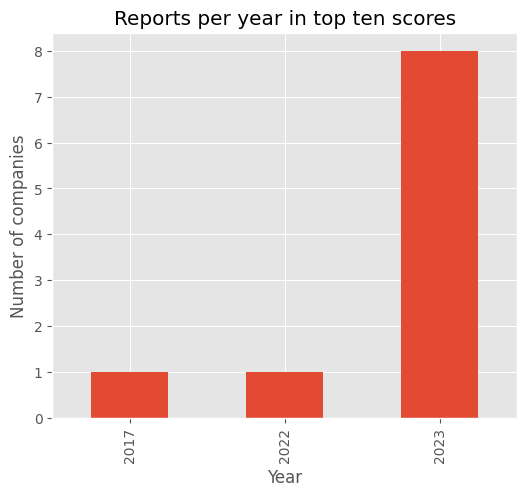

In [94]:
top_tencount = top_ten.groupby(['Year'])['Company'].count()
top_tencount.plot(kind='bar', title='Reports per year in top ten scores', ylabel='Number of companies', xlabel='Year', figsize=(6,5))

In [95]:
lower_ten = real_df.sort_values(by=['Score'],inplace=False,ascending=False).tail(10)

<Axes: title={'center': 'Reports per year in lower ten scores'}, xlabel='Year', ylabel='Number of companies'>

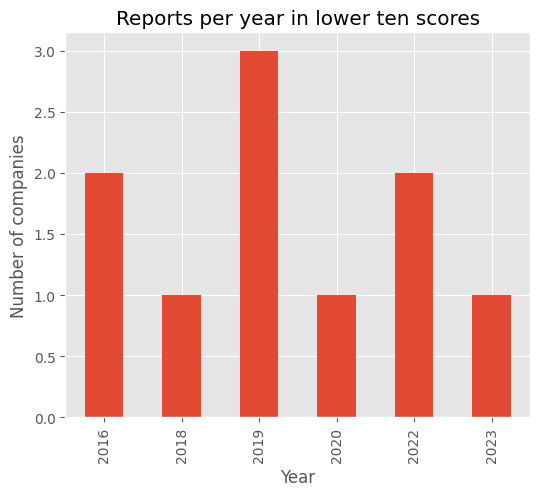

In [96]:
lower_tencount = lower_ten.groupby(['Year'])['Company'].count()
lower_tencount.plot(kind='bar', title='Reports per year in lower ten scores', ylabel='Number of companies', xlabel='Year', figsize=(6,5))